# 911 Calls

911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib import pyplot

In [48]:
sns.set_style('whitegrid')
%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})

In [49]:
dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
df = pd.read_csv("911.csv", header=0, names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
    dtype={'lat':str,'lng':str,'desc':str,'zip':str,
           'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}, 
            parse_dates=['timeStamp'],date_parser=dateparse)

## Create New Variables

In [50]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [51]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [52]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [53]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [54]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [55]:
df.drop('e', axis = 1, inplace = True)

In [56]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.2978759,-75.5812935,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.2580614,-75.2646799,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.1211818,-75.3519752,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.1161530,-75.3435130,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.2514920,-75.6033497,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10


## EDA

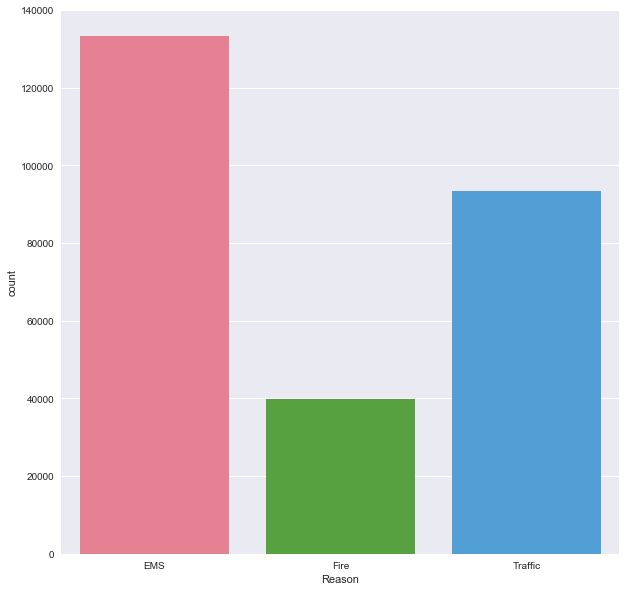

In [57]:
sns.countplot(x='Reason', data=df, palette="husl")

### Hour

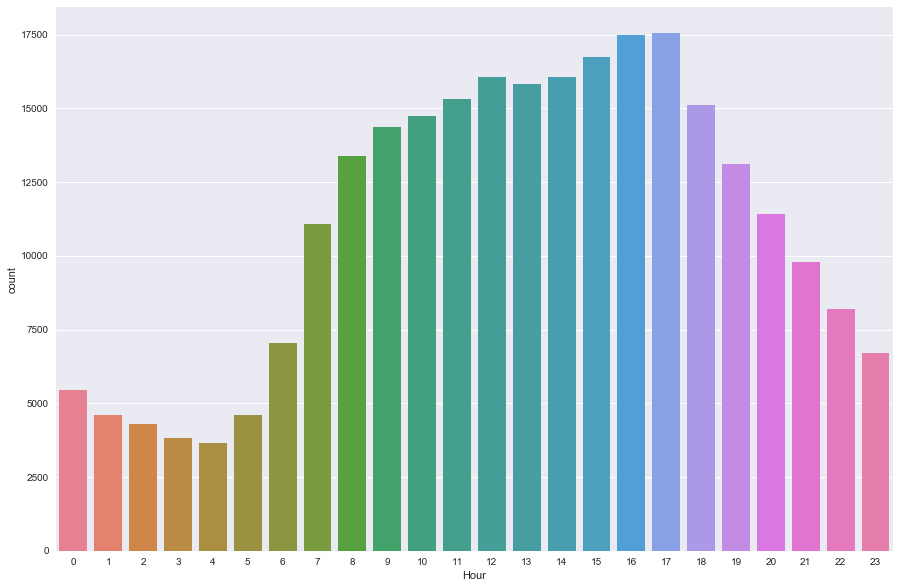

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.countplot(x='Hour', data=df, palette='husl')

### Day of Week

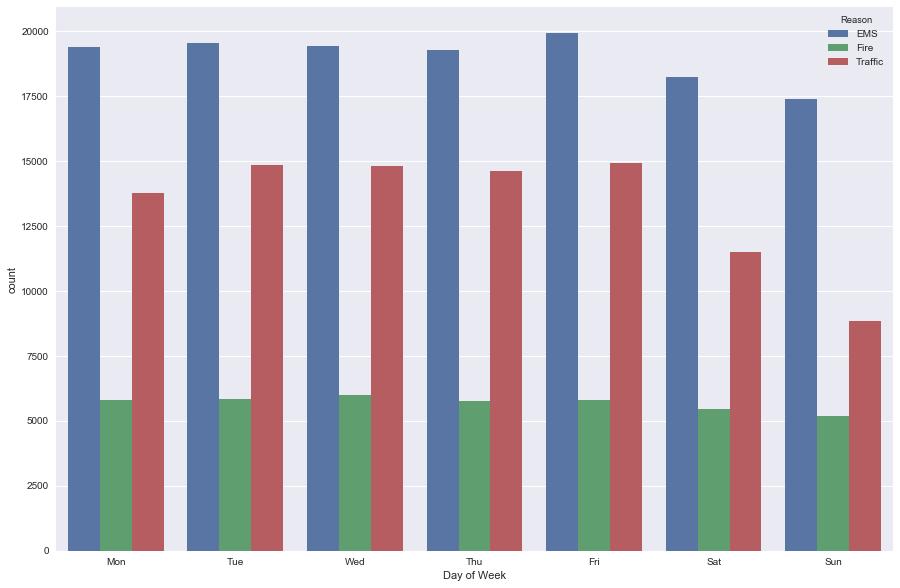

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.countplot(x='Day of Week', data=df, hue = 'Reason', order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

### Month

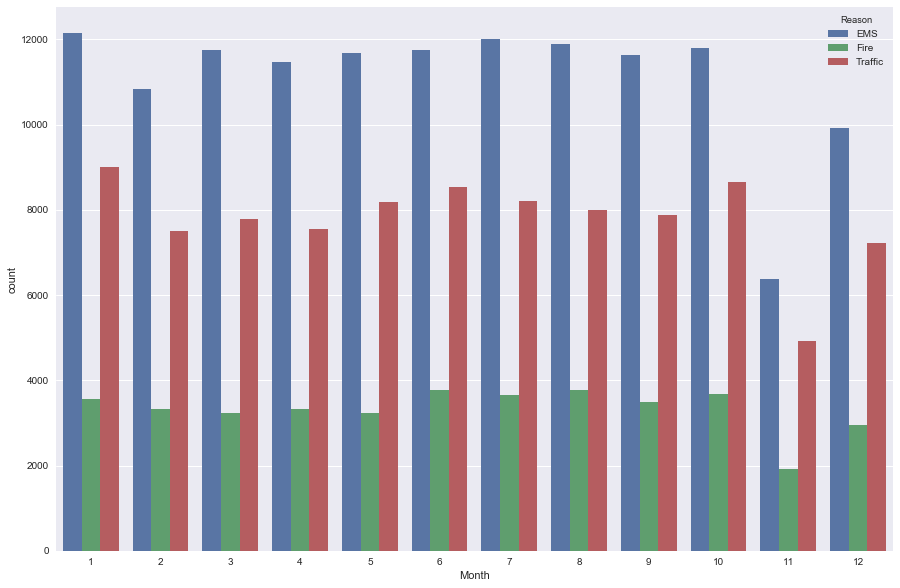

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.countplot(x='Month', data=df, hue = 'Reason')

### Time Line Chart

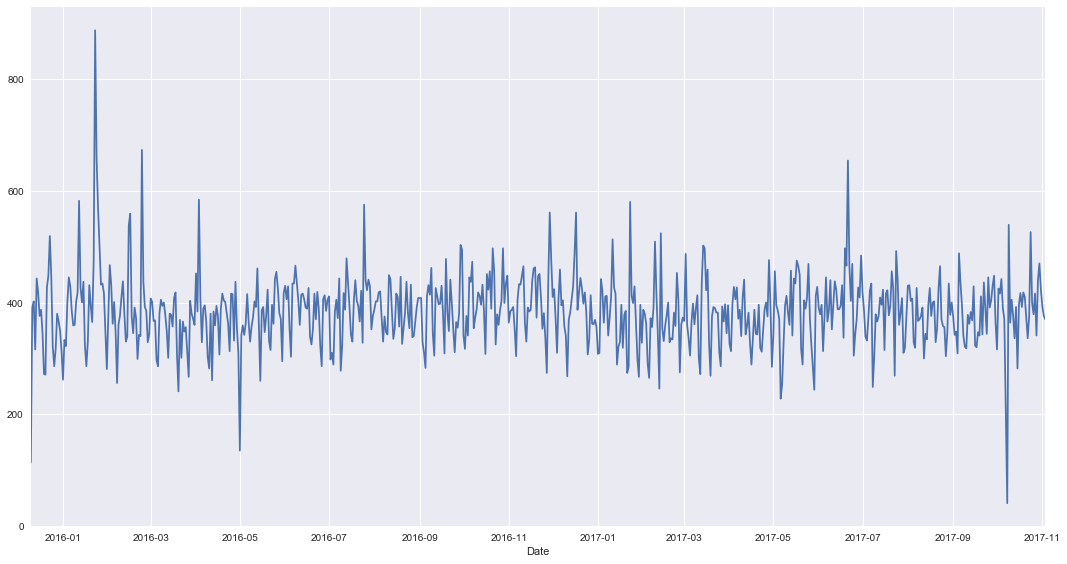

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

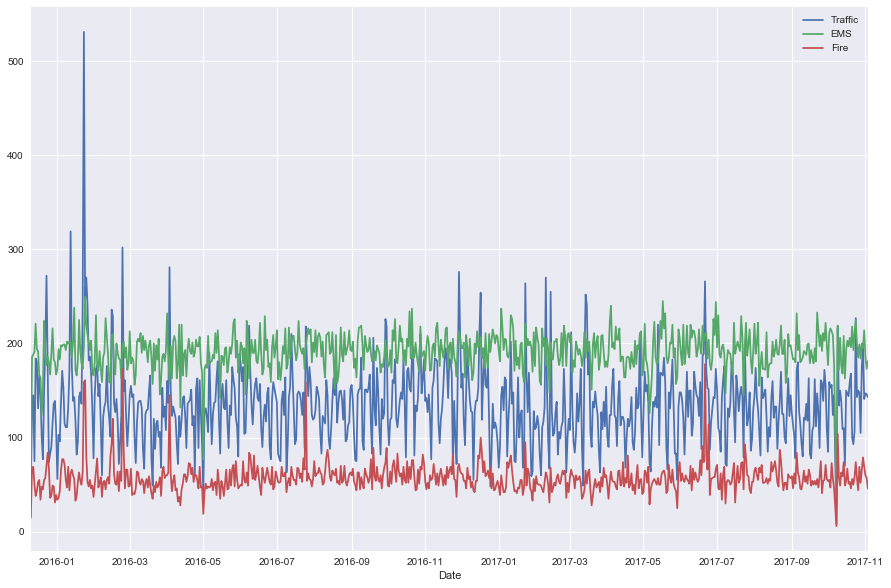

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
leg = ax.legend(['Traffic','EMS', 'Fire']);

### Date

In [130]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,716,643,577,522,493,631,1070,1722,2007,2111,...,2479,2688,2804,2721,2140,2041,1752,1497,1416,1109
Mon,746,572,542,493,546,711,1064,1806,2267,2320,...,2296,2508,2617,2617,2254,1814,1591,1257,1077,818
Sat,914,804,718,651,597,626,767,1021,1302,1656,...,2134,2053,2065,2055,1982,1896,1640,1503,1324,1206
Sun,952,835,815,665,578,618,730,939,1192,1519,...,1902,1780,1802,1853,1822,1700,1436,1267,986,904
Thu,713,545,591,491,488,666,1126,1837,2131,2247,...,2410,2568,2571,2761,2274,1872,1631,1443,1153,927


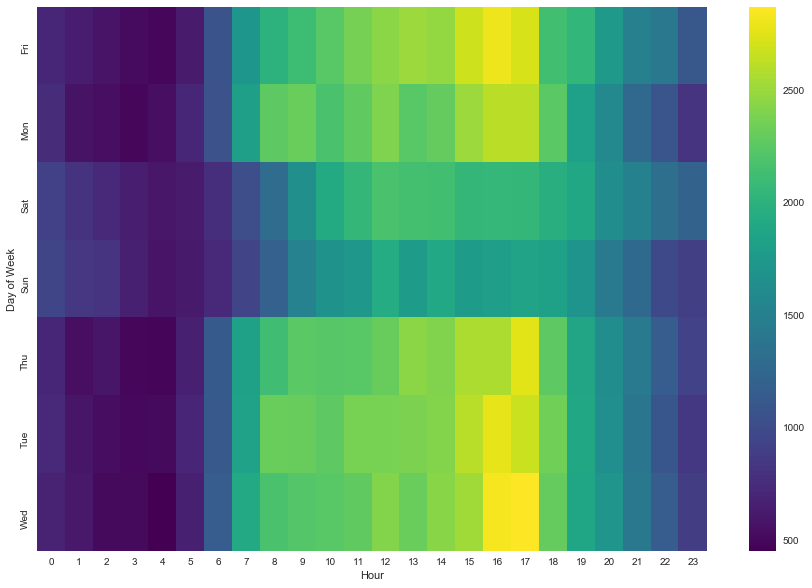

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(dayHour,cmap='viridis')

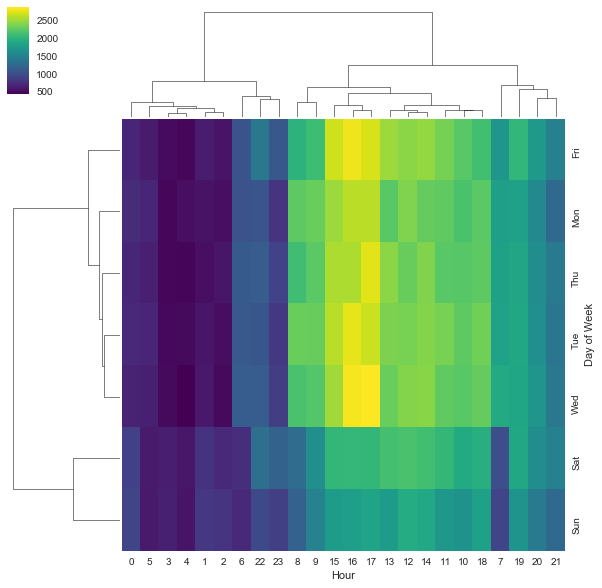

In [127]:
sns.clustermap(dayHour,cmap='viridis')

In [128]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,2069,3116
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,1682,2777
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,1516,2975
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,1281,2177
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,2006,3264


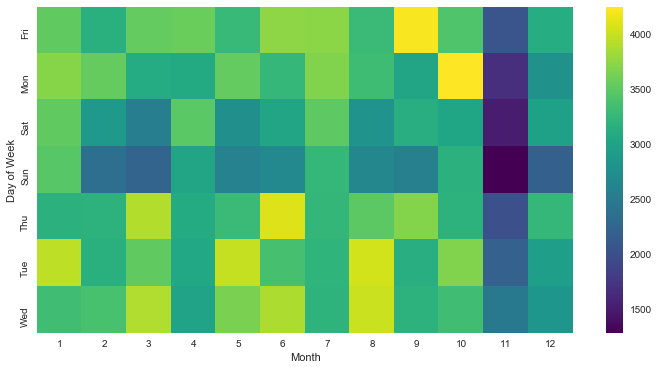

In [132]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

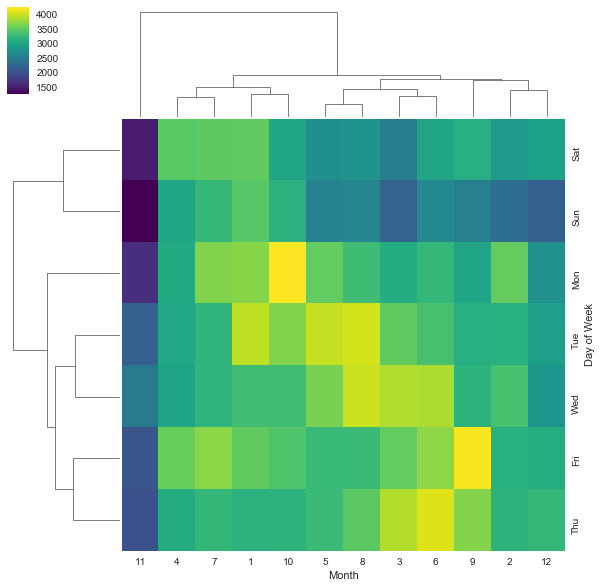

In [133]:
sns.clustermap(dayMonth,cmap='viridis')